# Loops & Orbits &mdash; Week 2 &mdash; Day 1 &mdash; Jupyter Notebook

## Knocking the Ball out of the Park

## THIS IS A WORK IN PROGRESS &mdash; PLEASE DO NOT START ON IT

In [1]:
# Initial speed of hit ball in meters per second
initial_speed = 50

# Initial angle of hit ball in degrees from horizontal
initial_angle = 35

# Air resistance factor
# Adjust so ball travels 400 feet

# Simulation time step in seconds
delta_t = 0.1

# Distance to fence in meters
distance_to_fence = 110

# Initial speed of hit ball
initial_speed = 50

# Initial angle of hit ball in degrees from horizontal
initial_angle = 35

# x-acceleration -- there is no x acceleration (until we put in wind resistance, which slows the motion)
x_acceleration = 0.0

# y-accleration -- the y acceleration is due to gravity -- the amount is 9.81 m/s^2 downwards
y_acceleration = -9.81

# Air resistance factor
# Adjust so ball travels 400 feet

# Simulation time step in seconds
delta_t = 0.1

In [2]:
# You don't know how import statements work yet.
# Trust that the following allows you to use the sin function,
# the cos function, and the constant pi in your code:
from math import sin, cos, pi

# You should check that your function returns 0 when angle is 90 degrees
def horizontal_velocity(speed, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * 2 * pi / 360
    return speed * cos(angle)
    
# You should check that your function returns 0.0 when angle is 90 degrees
def vertical_velocity(speed, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * 2 * pi / 360
    return speed * sin(angle)

initial_x_velocity = horizontal_velocity(initial_speed, initial_angle)

initial_y_velocity = vertical_velocity(initial_speed, initial_angle)

initial_x_velocity, initial_y_velocity

(40.95760221444959, 28.678821817552304)

## The While Loop That Does the Work


In [3]:
# Initialize the velocities
x_velocities = [initial_x_velocity]
y_velocities = [initial_y_velocity]

# Initialize the positions -- put point of the ball hitting the bat at 0.0, 1.0
x_positions = [0.0]
y_positions = [1.0]

# Initialize the times -- simulation start when batter hits ball
times = [0.0]

# We go until the ball hits the ground
while y_positions[-1] > 0:
    #
    # get all the before values -- they are the ones at the end of the lists
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # calculate the after values
    #
    # x and y velocities are updated with accelerations
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # x and y positions are updated with velocities
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)
    
x_positions, y_positions, times

([0.0,
  4.095760221444959,
  8.191520442889917,
  12.287280664334876,
  16.383040885779835,
  20.478801107224793,
  24.574561328669752,
  28.67032155011471,
  32.76608177155967,
  36.86184199300463,
  40.957602214449594,
  45.053362435894556,
  49.14912265733952,
  53.24488287878448,
  57.34064310022944,
  61.436403321674405,
  65.53216354311937,
  69.62792376456433,
  73.72368398600929,
  77.81944420745425,
  81.91520442889922,
  86.01096465034418,
  90.10672487178914,
  94.2024850932341,
  98.29824531467906,
  102.39400553612403,
  106.48976575756899,
  110.58552597901395,
  114.68128620045891,
  118.77704642190388,
  122.87280664334884,
  126.9685668647938,
  131.06432708623876,
  135.1600873076837,
  139.25584752912866,
  143.3516077505736,
  147.44736797201855,
  151.5431281934635,
  155.63888841490845,
  159.7346486363534,
  163.83040885779835,
  167.9261690792433,
  172.02192930068824,
  176.1176895221332,
  180.21344974357814,
  184.3092099650231,
  188.40497018646803,
  192.5

## Make a Position vs. Time Graph

**I have noticed that the following code cell often needs to be executed twice in order to show.**

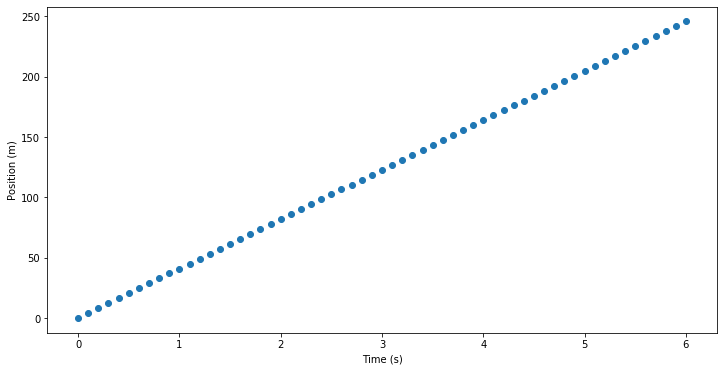

"BAD NEWS: If you have done everything right, the oscillation grows -- which it definitely didn't do in the video."

In [5]:
%matplotlib inline
# The previous line works around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(times, x_positions)

plt.xlabel("Time (s)")
plt.ylabel("Horizontal position (m)")

plt.show()

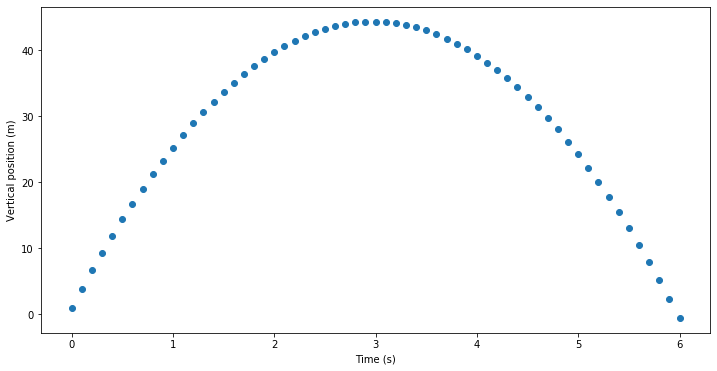

In [6]:
%matplotlib inline
# The previous line works around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(times, y_positions)

plt.xlabel("Time (s)")
plt.ylabel("Vertical position (m)")

plt.show()

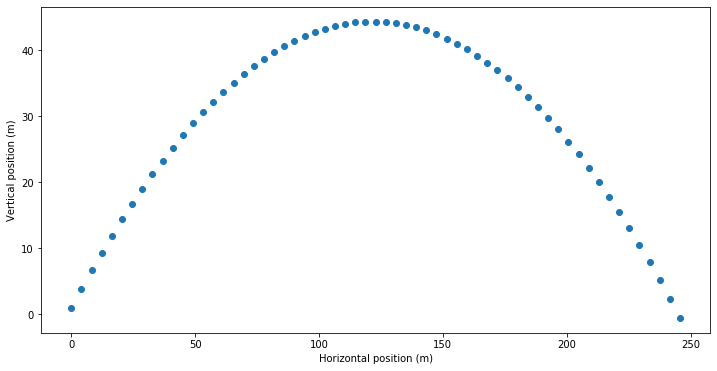

In [7]:
%matplotlib inline
# The previous line works around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(x_positions, y_positions)

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")

plt.show()

## The Euler Method vs. the Euler-Cromer Method vs. the Midpoint Method

You may have been bothered that we use before_velocity when we update the position:

```
after_position = before_position + delta_t * before_velocity
```

This is a choice. There are other possibilities. This choice is called the Euler Method.

How about using after_velocity instead:

```
after_position = before_position + delta_t * after_velocity
```

This choice is called the [Euler-Cromer Method](http://liceocuneo.it/oddenino/wp-content/uploads/sites/2/Alan-Cromer-Stable-solutions-using-the-Euler-Approximation-American-Journal-of-Physics-49-455-1981.pdf) and it was published in 1981.

How about being "democratic" about it and using:

```
after_position = before_position + delta_t * (after_velocity + before_velocity) / 2

```

The democratic choice is called the Midpoint Method.

It happens that the Euler-Cromer method works darned well for the air glider on a spring.

**Finish today by doing the following:**

* Change time_steps to 550 to give 5.5 seconds of simulation &mdash; in the video that was how long 13 oscillation cycles took.
* Let's triple the amplitude to 0.033! Will that affect the number of oscillations?
* Be sure to re-execute the initialization code cell or the preceding two changes will have no effect.
* Change the for loop to use the Euler-Cromer Method. Don't over-think this. If you understand the discussion above you'll see that it is a one-word change. Once you've done it, re-execute the for-loop code cell.
* Execute the plot cell code below. How many complete oscillation cycles do you count?
* Read the conclusion. Have Ben or me check your results and ask any questions you have.
* We will have a question for you having to do with the k_over_m parameter.

## Re-Make the Position vs. Time Graph

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(times, positions)

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.show()

"GOOD NEWS: The Euler-Cromer method works well for the air-cart-on-a-spring problem."

## Conclusion

Compare with the [the video](https://youtu.be/gvPNrdfNo9g?t=14). Savor the success.

Error can get out of control with numerical simulation even in very simple problems. A lot of what we will be doing is implementing strategies to reduce error.

Sadly, although the Euler-Cromer method worked perfectly for this problem, there are two issues:

* We don't have any theory yet as to why it worked better than the Euler method.
* On many problems the Euler-Cromer method does not work better &mdash; we will be introducing something called Runge-Kutta next week.

While we are developing the theory next week, we will also be trying other problems &mdash; including two-dimensional problems.